# Non-Linear Shooting Method

To numerically approximate the non-linear Boundary Value Problem
$$
y^{''}=f(x,y,y^{'}) \ \ \ a < x < b $$
$$y(a)=\alpha$$
$$y(b) =\beta$$

The Boundary Value Problem is divided into two Initial Value Problems:
1. The first 2nd order non-linear Intial Value Problem is the same as the original Boundary Value Problem with an extra initial condtion $y_1^{'}(a)=\lambda_0$. 
\begin{equation}
 y^{''}_1=f(x,y,y^{'}), \ \    y_1(a)=\alpha, \ \ \color{red}{y^{'}_1(a)=\lambda_0},\\
\end{equation}
2. The second 2nd order Intial Value Problem is the homogenous form of the original Boundary Value Problem with the initial condtions $z(a)=0$ and $z^{'}(a)=1$.

\begin{equation}
z^{''}=\frac{\partial f}{\partial y^{'}}z^{'}(x,\lambda)+\frac{\partial f}{\partial y}z(x,\lambda), \ \ \color{green}{z(a)=0, \ \ z^{'}(a)=1}.
\end{equation}
combining these results together to get the unique solution 
\begin{equation}
y(x)=y_1(x).
\end{equation}
Unlike the linear method, the non-linear shooting method is iterative to get the value of $\lambda$ that results in the same solution as the Boundary Value Problem.

The first choice of $\lambda_0$ is a guess. Then after the first iteration a Newton Raphson method is used to update $\lambda$ 

$$\lambda_k=\lambda_{k-1}-\frac{y(b,\lambda_{k-1})-\beta}{\frac{dy}{d \lambda}(b,\lambda_{k-1})}$$
until $\lambda_{k+1}-\lambda_{k+1}<tol$.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
from IPython.core.display import HTML


def _repr_html_(self):
    html = ["<table>"]
    for row in self:
        html.append("<tr>")

        for col in row:
            html.append("<td>{0}</td>".format(col))

        html.append("</tr>")
    html.append("</table>")
    return ''.join(html)
from IPython.display import HTML    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Example Non-linear Boundary Value Problem
To illustrate the shooting method we shall apply it to the non-linear Boundary Value Problem:
$$ y^{''}=-2yy^{'}, $$
with boundary conditions
$$y(0) = -2.5, $$
$$y(1) = 3. $$
The __boundary value problem__ is broken into two second order __Initial Value Problems:__
1. The first 2nd order Intial Value Problem is the same as the original Boundary Value Problem with an extra initial condtion $y^{'}(0)=\lambda_0$.
\begin{equation}
u^{''} =-2uu', \ \ \ \ u(0)=-2.5, \ \ \ \color{green}{u^{'}(0)=\lambda_0}
\end{equation}
2. The second 2nd order Intial Value Problem is the homogenous form of the original Boundary Value Problem with the initial condtions $z^{'}(0)=0$ and $z^{'}(0)=1$.
\begin{equation}
z^{''} =-2y^{'}z-2yz^{'}, \ \ \ \ \color{green}{z(1)=0}, \ \ \ \color{green}{z^{'}(1)=1}
\end{equation}

The first choice of $\lambda$ we guess $\lambda_0=0.2$. Then after the first iteration a Newton Raphson method is used to update $\lambda$ 

$$\lambda_k=\lambda_{k-1}-\frac{y(b,\lambda_{k-1})-\beta}{\frac{dy}{d \lambda}(b,\lambda_{k-1})}$$
until $\lambda_{k+1}-\lambda_{k+1}<0.001$.


## Discrete Axis
The stepsize is defined as
$$h=\frac{b-a}{N}$$
here it is 
$$h=\frac{1-0}{10}$$
giving 
$$x_i=0+0.1 i$$
for $i=0,1,...10.$

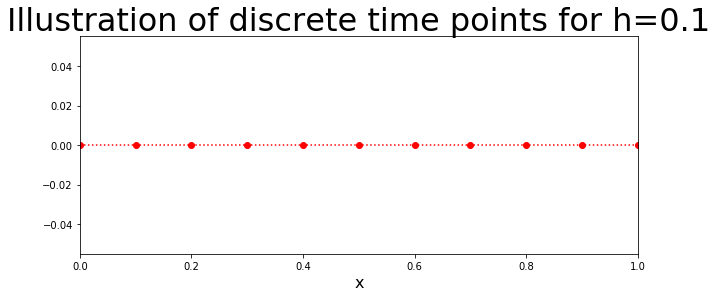

In [2]:
## BVP
N=10
h=1/N
x=np.linspace(0,1,N+1)
fig = plt.figure(figsize=(10,4))
plt.plot(x,0*x,'o:',color='red')
plt.xlim((0,1))
plt.xlabel('x',fontsize=16)
plt.title('Illustration of discrete time points for h=%s'%(h),fontsize=32)
plt.show()

## Initial conditions
The initial conditions for the discrete equations are:
$$ u_1[0]=-2.5$$
$$ u_2[0]=\lambda_0$$
$$ z_1[0]=0$$
$$ z_2[0]=1$$
$$ \beta=3$$
Let $\lambda_0=0.2$


In [3]:
U1=np.zeros(N+1)
U2=np.zeros(N+1)
Z1=np.zeros(N+1)
Z2=np.zeros(N+1)

lambda_app=[0.2]
U1[0]=-2.5
U2[0]=lambda_app[0]

Z1[0]=0
Z2[0]=1
beta=3

## Numerical method
The Euler method is applied to numerically approximate the solution of the system of the two second order non-linear initial value problems they are converted in to two pairs of two first order non-linear initial value problems:
1. Discrete form of Equation 1
$$u_{1 }[i+1]=u_{1 i}[i] + h u_{2 }[i]$$
$$u_{2 }[i+1]=u_{2 }[i] + h (-2u_{1}[i]u_{1 }[i])$$
with the initial conditions $u_{1}[0]=-2.5$ and $u_{2}[0]=\lambda_0.$


2. Discrete form of Equation 2
$$z_{1}[i+1]=z_{1 }[i] + h z_{2 }[i]$$
$$z_{2}[i+1]=z_{2 }[i] + h (-2z_{2}[i]y_{1 }[i]-2z_{1 }[i] y_{2 }[i])$$
with the initial conditions $z_{1}[0]=0$ and $z_{2}[0]=1$.

At the end of each iteration 
$$ U1[i] \approx y(x_i).$$
The initial choice of $\lambda_0=0.2$ is up to the user then for each iteration of the system $\lambda$ is updated using the formula:
$$\lambda_k=\lambda_{k-1}-\frac{u_1[10]-3}{z_1[10]}.$$

The plot below shows the numerical approximation of the solution to the non-linear Boundary Value Problem for each iteration.

The stopping criteria for the iterative process is
$$|\lambda_k-\lambda_{k-1}|<tol$$
with $tol=0.0001.$

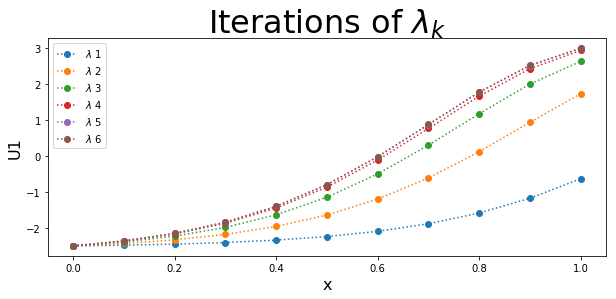

In [4]:
tol=0.0001
k=0
fig = plt.figure(figsize=(10,4))
while  k<10:
    k=k+1
    for i in range (0,N):
        U1[i+1]=U1[i]+h*(U2[i])
        U2[i+1]=U2[i]+h*(-2*U2[i]*U1[i])
    
        Z1[i+1]=Z1[i]+h*(Z2[i])
        Z2[i+1]=Z2[i]+h*(-2*U2[i]*Z1[i]-2*Z2[i]*U1[i])

    lambda_app.append(lambda_app[k-1]-(U1[N]-beta)/Z1[N])
   
    plt.plot(x,U1,':o',label=r"$\lambda$ %s"%(k))
    plt.xlabel('x',fontsize=16)
    plt.ylabel('U1',fontsize=16)
    U2[0]=lambda_app[k]
    if abs(lambda_app[k]-lambda_app[k-1])<tol:
        break
        
plt.legend(loc='best')
plt.title(r"Iterations of $\lambda_k$",fontsize=32)
plt.show()

## Results
The plot below shows the final iteration of the numerical approximation for the non-linear boundary value problem.

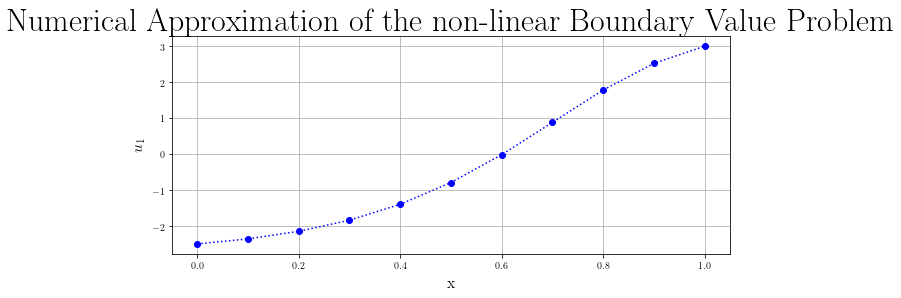

In [5]:
fig = plt.figure(figsize=(10,4))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.grid(True)
plt.plot(x,U1,'b:o')
plt.title(r"Numerical Approximation of the non-linear Boundary Value Problem",fontsize=32)
plt.xlabel('x',fontsize=16)
plt.ylabel(r"$u_1$",fontsize=16)
plt.show()


## $\lambda$ Iteration
The plot below shows the iterations of $\lambda_k$.

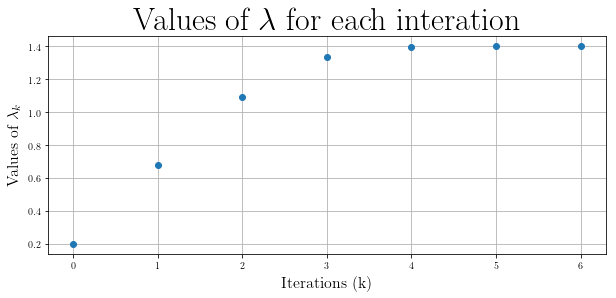

In [6]:
fig = plt.figure(figsize=(10,4))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.grid(True)
plt.plot(lambda_app,'o')
plt.title(r"Values of $\lambda$ for each interation ",fontsize=32)
plt.xlabel('Iterations (k)',fontsize=16)
plt.ylabel(r"Values of $\lambda_k$",fontsize=16)
plt.show()